<h2>Heart Disease Analysis</h2>

In [116]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB, BernoulliNB
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier

In [117]:
# import url
url = "heart.csv"
df = pd.read_csv(url)
df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [118]:
df.isnull().sum()

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

In [119]:
df.duplicated().sum()

1

In [120]:
# remove duplicate
df.drop_duplicates(inplace=True)

In [121]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 302 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       302 non-null    int64  
 1   sex       302 non-null    int64  
 2   cp        302 non-null    int64  
 3   trtbps    302 non-null    int64  
 4   chol      302 non-null    int64  
 5   fbs       302 non-null    int64  
 6   restecg   302 non-null    int64  
 7   thalachh  302 non-null    int64  
 8   exng      302 non-null    int64  
 9   oldpeak   302 non-null    float64
 10  slp       302 non-null    int64  
 11  caa       302 non-null    int64  
 12  thall     302 non-null    int64  
 13  output    302 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 35.4 KB


In [122]:
df.describe()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
count,302.00000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000
mean,54.42053,0.682119,0.963576,131.602649,246.500000,0.149007,0.526490,149.569536,0.327815,1.043046,1.397351,0.718543,2.314570,0.543046
std,9.04797,0.466426,1.032044,17.563394,51.753489,0.356686,0.526027,22.903527,0.470196,1.161452,0.616274,1.006748,0.613026,0.498970
min,29.00000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.00000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.250000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.50000,1.000000,1.000000,130.000000,240.500000,0.000000,1.000000,152.500000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.00000,1.000000,2.000000,140.000000,274.750000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.00000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


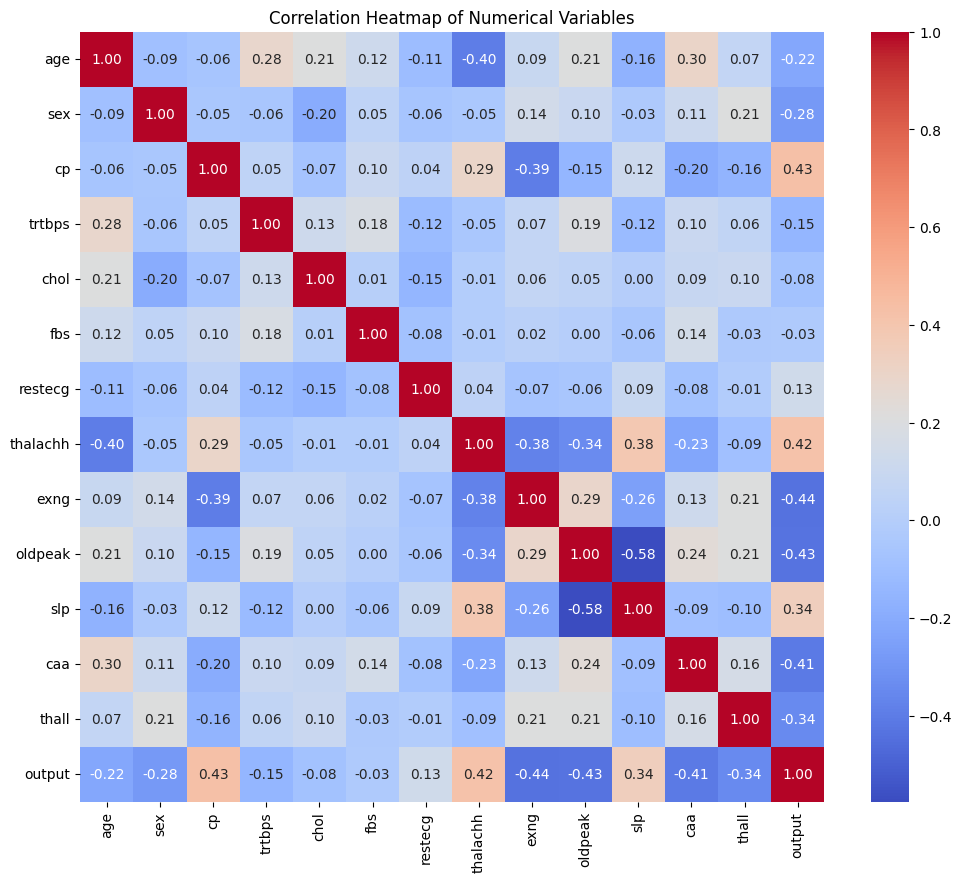

In [123]:
numerical_columns = df[['age', 'sex', 'cp', 'trtbps', 'chol', 'fbs', 'restecg', 'thalachh', 'exng', 'oldpeak', 'slp', 'caa', 'thall', 'output']]
correlation_matrix = numerical_columns.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Numerical Variables')
plt.show()

Text(0, 0.5, 'Age')

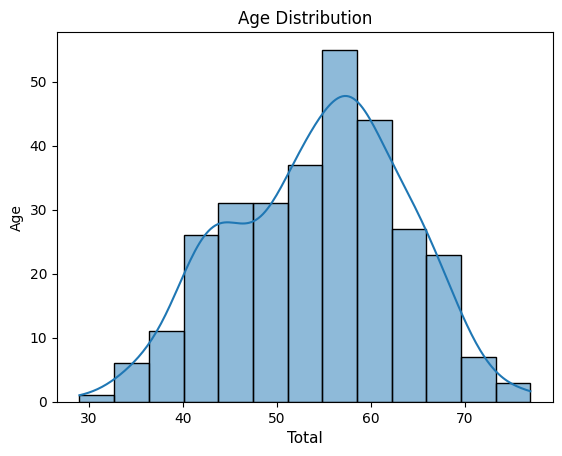

In [124]:
plt.title('Age Distribution')
sns.histplot(data=df,x="age", kde=True)
plt.xlabel('Total', fontweight='regular', fontsize=11, 
           fontfamily='sans-serif')
plt.ylabel('Age')

<Figure size 800x600 with 0 Axes>

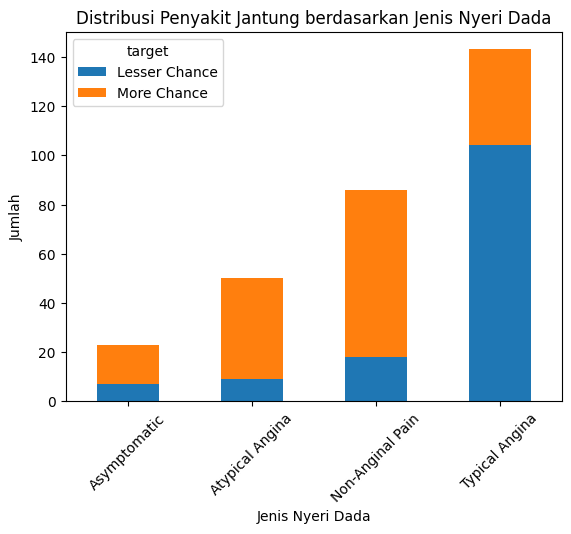

In [125]:
df['cp_label'] = df['cp'].map({
    0: 'Typical Angina',
    1: 'Atypical Angina',
    2: 'Non-Anginal Pain',
    3: 'Asymptomatic'
})
ct = pd.crosstab(df['cp_label'], df['output'])
plt.figure(figsize=(8, 6))
ct.plot(kind='bar', stacked=True)
plt.title('Distribusi Penyakit Jantung berdasarkan Jenis Nyeri Dada')
plt.xlabel('Jenis Nyeri Dada')
plt.ylabel('Jumlah')
plt.legend(title='target', loc='upper left', labels=['Lesser Chance', 'More Chance'])
plt.xticks(rotation=45) 
plt.show()

orang yang mengalami Atypical Angina cenderung memiliki kemungkinan penyakit jantung yang lebih tinggi dibandingkan dengan jenis chest pain lainnya. Typical Angina dan Non-Anginal Pain juga menunjukkan kasus penyakit jantung, namun pada jumlah yang lebih rendah. Kasus Asymptomatic, memperlihatkan juga adanya penyakit jantung, berarti orang tanpa nyeri dada tampaknya juga memiliki gejala penyakit jantung. 

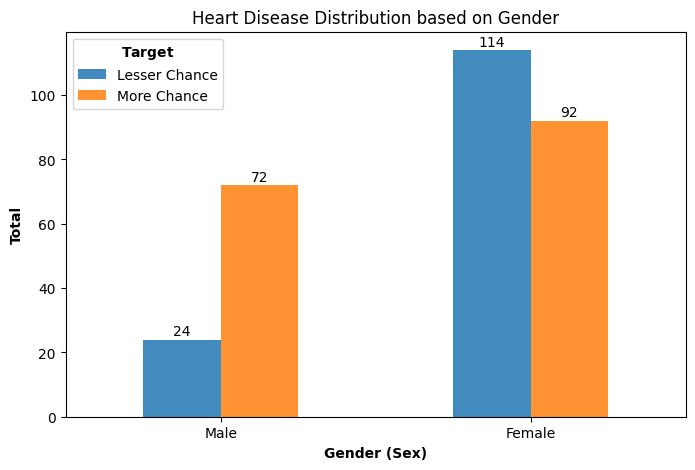

In [126]:
ax = pd.crosstab(df.sex, df.output).plot(kind='bar', figsize=(8, 5),alpha=0.85)
for rect in ax.patches:
    ax.text (rect.get_x()+rect.get_width()/2, 
             rect.get_height()+1.25,rect.get_height(), 
             horizontalalignment='center', fontsize=10)
plt.title('Heart Disease Distribution based on Gender')
plt.xlabel('Gender (Sex)', fontfamily='sans-serif', fontweight='bold')
plt.ylabel('Total', fontfamily='sans-serif', fontweight='bold')
plt.xticks(np.array([0, 1]), ['Male', 'Female'], rotation=0)
plt.legend(labels=['Lesser Chance', 'More Chance'], title='$\\bf{Target}$', loc='upper left',);

pada perempuan, dapat dilihat distribusi antara yang memiliki chance dan tidak memiliki chance penyakit jantung hampir sama, sehingga terlihat bahwa perempuan dalam dataset ini memiliki risiko yang lebih tinggi untuk mendapat penyakit jantung dibanding laki-laki.

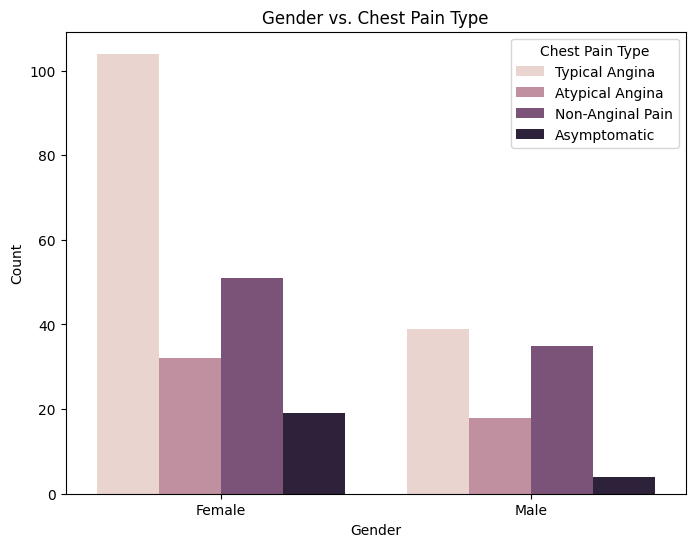

In [127]:
df['Gender'] = df['sex'].map({1: 'Female', 0: 'Male'})
plt.figure(figsize=(8, 6))
ax = sns.countplot(x='Gender', hue='cp', data=df)
plt.title('Gender vs. Chest Pain Type')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.legend(title='Chest Pain Type', loc='upper right', labels=['Typical Angina', 'Atypical Angina', 'Non-Anginal Pain', 'Asymptomatic'])
plt.show()

Pada perempuan, jenis chest pain Typical Angina cenderung lebih umum daripada jenis chest pain lainnya. Dan pada laki-laki, terdapat distribusi chest pain yang lebih merata di antara jenis chest pain, dengan 'Non-Anginal Pain' dan 'Atypical Angina' mendekati jumlah yang serupa.

In [128]:
df.drop(['Gender','cp_label'],axis=1,inplace=True)
features = df.drop(['output'], axis=1)
target = df['output']

In [129]:
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [130]:
models = {
    'XGBoost': XGBClassifier(),
    'K-Nearest Neighbor': KNeighborsClassifier(),
    'Logistic Regression': LogisticRegression(),
    'Gaussian Naive Bayes': GaussianNB(),
    'Bernoulli Naive Bayes': BernoulliNB(),
    'Support Vector Machine': SVC(),
    'Random Forest': RandomForestClassifier()
}

In [132]:
results = {'Model': [], 'Accuracy': []}

# Training and evaluating models
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    results['Model'].append(name)
    results['Accuracy'].append(accuracy)

results_df = pd.DataFrame(results)

# Display results sorted by accuracy
results_df = results_df.sort_values(by='Accuracy', ascending=False)
print(results_df)

best_model = results_df.iloc[0]['Model']
best_accuracy = results_df.iloc[0]['Accuracy']
print(f"\nThe best model is '{best_model}' with an accuracy of {best_accuracy:.4f}.")

                    Model  Accuracy
1      K-Nearest Neighbor  0.918033
3    Gaussian Naive Bayes  0.885246
4   Bernoulli Naive Bayes  0.868852
5  Support Vector Machine  0.868852
6           Random Forest  0.868852
0                 XGBoost  0.836066
2     Logistic Regression  0.836066

The best model is 'K-Nearest Neighbor' with an accuracy of 0.9180.


Hasil model menunjukkan K-Nearest Neighbor merupakan model terbaik dengan akurasi sebesar 91.80%. Model ini memiliki hasil terbaik untuk memprediksi hasil terkait chance dari penyakit jantung. Model-model lainnya yang digunakan yaitu, Gaussian Naive Bayes, Bernoulli Naive Bayes, Support Vector Machine, dan Random Forest juga memiliki performa yang baik dengan tingkat akurasi di atas 86%, dan XGBoost, Logistic Regression di bawah dengan akurasi sekitar 83%. Sehingga, K-Nearest Neighbor bisa menjadi pilihan model yang cocok dalam memprediksi peluang penyakit jantung.